# Recommendation system using correlation in python

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.


# source = https://grouplens.org/datasets/movielens/

# import libraries

In [51]:
import pandas as pd
import numpy as np


# getting the data ready

In [52]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep= '\t',names= column_names)

In [53]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# getting the movie titles  

In [54]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [55]:
# this is used to map the item id with the movie titles

df = pd.merge(df,movie_titles,on= 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA performing EDA to get a look at some of the best rated movies 

visualization imports

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

creating a ratings dataframe with average ratings and number of ratings

 df2  = with ratings
 df3 = with count of ratings

In [57]:
df2 = df.groupby('title')['rating'].mean().sort_values(ascending= False)

In [58]:
df2.head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [59]:
df3 = df.groupby('title')['rating'].count().sort_values(ascending= False)
df3.head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [60]:
ratings = pd.DataFrame(df2)
ratings.head(100)

,rating
title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
...,...
Arsenic and Old Lace (1944),4.078261
"Wizard of Oz, The (1939)",4.077236
Glory (1989),4.076023


 setting up the number of ratings column

In [61]:
ratings["Number of ratings"] = pd.DataFrame(df3)
ratings.head(40)

,rating,Number of ratings
title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


In [62]:
 # ratings['rating'] = ratings['rating'].round(2).astype(int)

<AxesSubplot:>

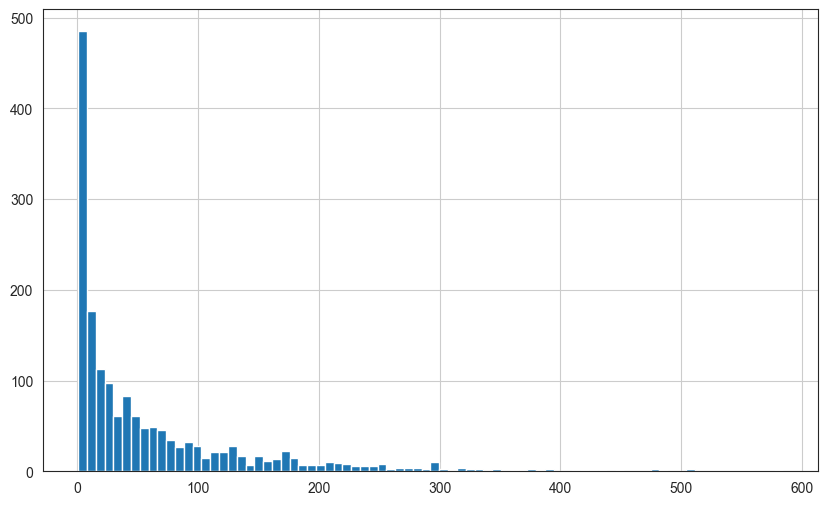

In [63]:
# plotting a few histograms


plt.figure(figsize=(10,6))
ratings['Number of ratings'].hist(bins= 80)

<AxesSubplot:>

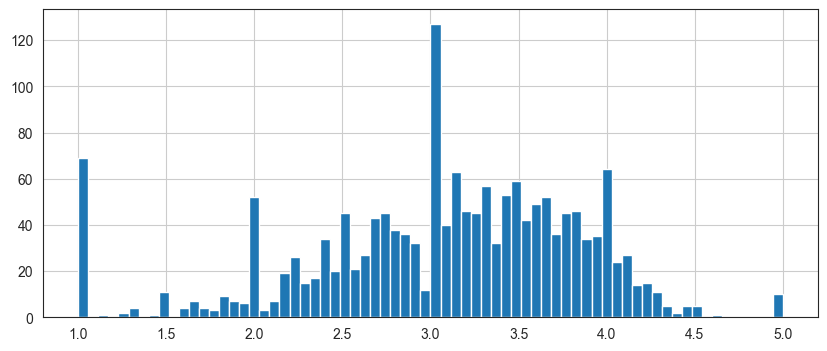

In [64]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)